Прочитайте базу my_BRENT2019.csv
Добавьте первые разности и стоимости доллара и евро к рублю(можно добавить их 1-е разности)
сделайте ее перрасчет (ресемплинг) в представление по неделям.
Постройте модель предсказания 1-й точки от текущей (h=1).
Добавьте еще один экзогенный фактор - любой:)

Сравните модель с дополнительным экзогенным фактором и исходную и сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
brent=pd.read_csv('my_BRENT2019.csv')
brent.index=pd.to_datetime(brent['Дата'])
brent.drop('Дата', inplace=True, axis=1)

In [3]:
brent['price_diff1']=0
brent.iloc[1:,11]=np.array(brent.iloc[1:,0])-np.array(brent.iloc[:-1,0])

In [4]:
brent.iloc[1:,11]=brent.iloc[1:,0]-brent.iloc[:-1,0]

In [5]:
brent

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,price_diff1
Дата,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,0.0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0.0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0,0.0
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,0.0
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,0.0


In [6]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.rename(columns={'curs':'usd'}, inplace=True)
rub_doll

,usd
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771
...,...
2019-08-27,65.9735
2019-08-28,66.2608
2019-08-29,66.4127
2019-08-30,66.7471


In [7]:
rub_e=pd.read_excel('RC_F01_09_2010_T01_09_2019 (1).xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.rename(columns={'curs':'eu'}, inplace=True)
rub_e.head()

,eu
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [8]:
brent=brent.merge(rub_doll, how='left', left_index=True, right_index=True)

In [9]:
brent=brent.merge(rub_e, how='left', left_index=True, right_index=True)

In [12]:
brent_w=brent.resample('W').mean()

In [13]:
bool_series = pd.isnull(brent_w['eu'])
brent_w[bool_series]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,price_diff1,usd,eu
Дата,,,,,,,,,,,,,,
2011-01-09,94.558000,2011.0,1.0,6.000000,1.0,6.000000,1.0,3.000000,0.000000,0.0,0.000000,0.0,NaN,NaN
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-08,112.974000,2012.0,1.0,5.200000,1.0,5.200000,1.0,3.200000,0.000000,0.0,0.200000,0.0,NaN,NaN
2013-01-06,110.688000,2012.8,3.2,9.200000,1.6,76.200000,1.0,3.000000,0.000000,0.2,0.200000,0.0,NaN,NaN
2015-01-11,50.908333,2015.0,1.0,7.666667,1.0,7.666667,2.0,2.666667,0.000000,0.0,0.000000,0.0,NaN,NaN
2016-01-10,35.982000,2016.0,1.0,6.000000,1.0,6.000000,1.0,2.000000,0.000000,0.0,0.000000,0.0,NaN,NaN
2017-01-08,56.578333,2017.0,1.0,4.666667,1.0,4.666667,1.0,2.666667,0.166667,0.0,0.166667,0.0,NaN,NaN
2018-01-07,67.578000,2018.0,1.0,4.200000,1.0,4.200000,1.0,3.200000,0.000000,0.0,0.200000,0.0,NaN,NaN
2019-01-06,55.916000,2018.8,3.2,9.200000,1.6,76.000000,1.0,3.000000,0.000000,0.2,0.200000,0.0,NaN,NaN


In [14]:
brent_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 14 columns):
Значение           469 non-null float64
year               469 non-null float64
month              469 non-null float64
dayofmonth         469 non-null float64
quarter            469 non-null float64
dayofyear          469 non-null float64
weekofyear         469 non-null float64
dayofweek          469 non-null float64
is_holiday         469 non-null float64
is_prev_holiday    469 non-null float64
is_next_holiday    469 non-null float64
price_diff1        469 non-null float64
usd                461 non-null float64
eu                 461 non-null float64
dtypes: float64(14)
memory usage: 55.1 KB


In [15]:

null = pd.isnull(brent_w['Значение'])
brent_w[null]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,price_diff1,usd,eu
Дата,,,,,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
brent_w.loc['2011-10-16',:]

Значение          NaN
year              NaN
month             NaN
dayofmonth        NaN
quarter           NaN
dayofyear         NaN
weekofyear        NaN
dayofweek         NaN
is_holiday        NaN
is_prev_holiday   NaN
is_next_holiday   NaN
price_diff1       NaN
usd               NaN
eu                NaN
Name: 2011-10-16 00:00:00, dtype: float64

In [17]:
from datetime import timedelta
for i in brent_w[bool_series].index:
    brent_w.loc[i,'usd']=brent_w.loc[i-timedelta(days=7),'usd']
    brent_w.loc[i,'eu']=brent_w.loc[i-timedelta(days=7),'eu']

In [18]:
brent_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 14 columns):
Значение           469 non-null float64
year               469 non-null float64
month              469 non-null float64
dayofmonth         469 non-null float64
quarter            469 non-null float64
dayofyear          469 non-null float64
weekofyear         469 non-null float64
dayofweek          469 non-null float64
is_holiday         469 non-null float64
is_prev_holiday    469 non-null float64
is_next_holiday    469 non-null float64
price_diff1        469 non-null float64
usd                470 non-null float64
eu                 470 non-null float64
dtypes: float64(14)
memory usage: 71.1 KB


In [19]:
brent_w.dropna(inplace=True)

In [20]:
brent_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 469 entries, 2010-09-05 to 2019-09-01
Data columns (total 14 columns):
Значение           469 non-null float64
year               469 non-null float64
month              469 non-null float64
dayofmonth         469 non-null float64
quarter            469 non-null float64
dayofyear          469 non-null float64
weekofyear         469 non-null float64
dayofweek          469 non-null float64
is_holiday         469 non-null float64
is_prev_holiday    469 non-null float64
is_next_holiday    469 non-null float64
price_diff1        469 non-null float64
usd                469 non-null float64
eu                 469 non-null float64
dtypes: float64(14)
memory usage: 55.0 KB


In [21]:
scl_target=StandardScaler() 

h=1
target = brent_w["Значение"].values[h:].reshape((brent_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(468, 1)

In [22]:
scl_x=StandardScaler() 

X = brent_w.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(468, 14)

In [23]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

E:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


(468, 5)

In [24]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

E:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


(468, 2)

In [25]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(468, 1)

In [26]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  1  7 12 13]
Номера признаков лучших признаков по процентной форме:  [ 0 12]
Номера признаков для выбора по модели :  [0]


In [27]:
X_new = X[:,[0,1,7,12,13]]

In [28]:
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

E:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


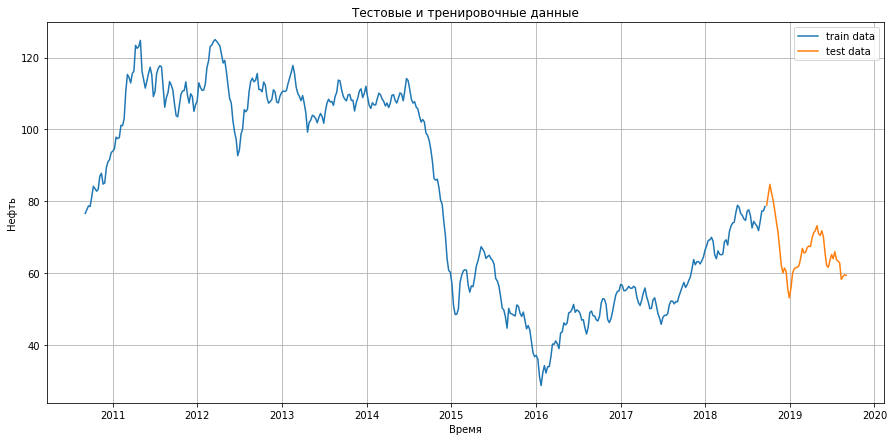

In [29]:
train, test = split_data( brent_w, -50)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [30]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)

In [33]:
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
y_pred_g = model_g.predict(X_train)

In [35]:
y_test_pred_g = model_g.predict(X_test)

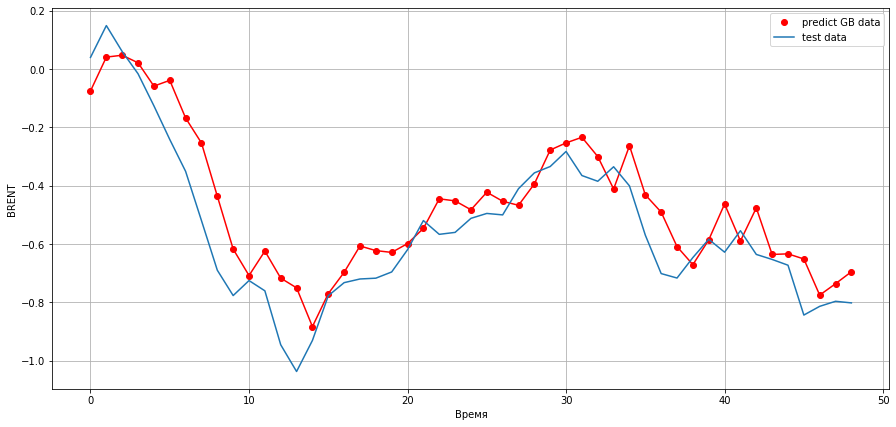

In [36]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:100],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:100],'r' )
plt.plot(y_test[:100], label='test data')
plt.grid()
plt.legend()
plt.show()

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   4.0377309840197775 %


In [39]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.607 (std: 0.409)
Parameters: {'n_estimators': 100, 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.591 (std: 0.440)
Parameters: {'n_estimators': 500, 'max_depth': 3}

Model with rank: 3
Mean validation score: 0.587 (std: 0.454)
Parameters: {'n_estimators': 200, 'max_depth': 3}



In [43]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=400)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   3.262041535533544 %


In [45]:
usd_index=pd.read_csv('USD.csv')

In [46]:
usd_index.index=pd.to_datetime(usd_index['Дата'], dayfirst=True)

In [47]:
brent

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,price_diff1,usd,eu
Дата,,,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.0,30.8669,39.0127
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.0,30.8001,39.1654
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,0.0,30.6858,39.2901
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0.0,30.6922,39.3505
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0,0.0,65.9735,73.3955
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,0.0,66.2608,73.6091
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,0.0,66.4127,73.6583


In [383]:
usd_index

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,,
2019-10-01,01.10.2019,"98,777","99,035","99,305","98,705","23,62K","-0,25%"
2019-09-30,30.09.2019,"99,021","98,770","99,115","98,710","13,81K","0,26%"
2019-09-27,27.09.2019,"98,761","98,805","98,955","98,630","10,39K","-0,00%"
2019-09-26,26.09.2019,"98,765","98,595","98,915","98,450","13,50K","0,11%"
2019-09-25,25.09.2019,"98,659","97,990","98,690","97,965","17,35K","0,75%"
...,...,...,...,...,...,...,...
2010-09-07,07.09.2010,"82,844","82,330","82,940","82,305","31,21K","0,94%"
2010-09-06,06.09.2010,"82,070","82,050","82,160","81,885","5,25K","-0,07%"
2010-09-03,03.09.2010,"82,124","82,485","82,635","82,015","20,91K","-0,46%"


In [48]:
price_toformat=np.array(usd_index['Цена'])
price_toformat

array(['98,777', '99,021', '98,761', ..., '82,124', '82,501', '82,549'],
      dtype=object)

In [49]:
price_list=[]
for price in price_toformat:
    new_price=float(str(price).replace(',','.'))
    price_list.append(new_price)

In [51]:
usd_index['usd_index']=price_list

In [53]:
usd_index_w=usd_index.resample('W').mean()

In [56]:
usd_index_w[:-5]

,usd_index
Дата,
2010-09-05,82.391333
2010-09-12,82.577000
2010-09-19,81.664800
2010-09-26,80.433000
2010-10-03,78.984400
...,...
2019-08-04,97.971800
2019-08-11,97.365200
2019-08-18,97.733400


In [55]:
brent_w

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,price_diff1,usd,eu
Дата,,,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.200000,0.000000,0.0,30.761250,39.204675
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.000000,0.166667,0.0,30.794020,39.293360
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.000000,0.000000,0.0,30.787750,39.769300
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.000000,0.000000,0.0,31.012000,40.988325
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.000000,0.000000,0.0,30.532200,41.274425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,62.791667,2019.0,7.500000,16.166667,3.000000,212.666667,31.0,2.666667,0.000000,0.000000,0.000000,0.0,63.537825,70.611975
2019-08-11,58.236667,2019.0,8.000000,7.666667,3.000000,219.666667,32.0,2.666667,0.000000,0.000000,0.000000,0.0,65.120175,72.845200
2019-08-18,59.033333,2019.0,8.000000,14.666667,3.000000,226.666667,33.0,2.666667,0.000000,0.000000,0.000000,0.0,65.531075,73.224175


In [57]:
brent_new=brent_w.merge(usd_index_w, how='left', left_index=True, right_index=True)

In [59]:
brent_new['usd_index'].isnull().value_counts()

False    469
Name: usd_index, dtype: int64

In [60]:
brent_new

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,price_diff1,usd,eu,usd_index
Дата,,,,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.200000,0.000000,0.0,30.761250,39.204675,82.391333
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.000000,0.166667,0.0,30.794020,39.293360,82.577000
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.000000,0.000000,0.0,30.787750,39.769300,81.664800
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.000000,0.000000,0.0,31.012000,40.988325,80.433000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.000000,0.000000,0.0,30.532200,41.274425,78.984400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,62.791667,2019.0,7.500000,16.166667,3.000000,212.666667,31.0,2.666667,0.000000,0.000000,0.000000,0.0,63.537825,70.611975,97.971800
2019-08-11,58.236667,2019.0,8.000000,7.666667,3.000000,219.666667,32.0,2.666667,0.000000,0.000000,0.000000,0.0,65.120175,72.845200,97.365200
2019-08-18,59.033333,2019.0,8.000000,14.666667,3.000000,226.666667,33.0,2.666667,0.000000,0.000000,0.000000,0.0,65.531075,73.224175,97.733400


In [61]:
scl_target=StandardScaler() 

h=1
target = brent_new["Значение"].values[h:].reshape((brent_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(468, 1)

In [62]:
scl_x=StandardScaler() 

X = brent_new.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(468, 15)

In [63]:
X_new = X[:,[0,1,7,12,13,14]]

In [64]:
train, test = split_data( brent_w, -50)

In [65]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [66]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=400)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   3.088426398992475 %


Добавление индекса доллара в модель значительно сократило ошибку модели, что подтверждает важность создания новых признаков.